
Exact counting using SAT-oracles
------------------------------------------------
Author: Roger Paredes (roger.paredes@rice.edu)

Based on this work: https://arxiv.org/abs/1806.00917.

In [23]:
from pycryptosat import Solver  # Linux/OSX can get it issuing: conda install -c conda-forge cryptominisat
from time import time  # for comaparison of run times
import networkx as nx  # for visualization only
import matplotlib.pyplot as plt  # for plotting only

In [24]:
def count_classic(cnf):  
    """
    Counts different solutions of Boolean formula in CNF form.
    
    Args:
        cnf (List[List[int]]): List of clauses.
    """
    number_of_variables = max(abs(var) for clause in cnf for var in clause)
    number_of_solutions = 0
    # Initialize solver and add clauses
    solver = Solver()
    solver.add_clauses(cnf)
    # Counting algorithm via banning of solutions
    while True:
        solution_exists, solution = solver.solve()                      # SAT-solver call
        if solution_exists:
            clause = []
            for var in range(1, number_of_variables+1):
                clause.append(-var if solution[var] else var)
            solver.add_clause(clause)                                   # Formula update
            number_of_solutions += 1
        else:
            return number_of_solutions
        
def count_projected_classic(cnf, s):
    """
    Counts different projected solutions of Boolean formula in CNF form.
    
    Args:
        cnf (List[List[int]]): List of clauses.
        s (List[bool]): Sampling set such that s[var] = True iff var is in sampling set S.
    """
    number_of_variables = max(abs(var) for clause in cnf for var in clause)
    number_of_solutions = 0
    # Initialize solver and add clauses
    solver = Solver()
    solver.add_clauses(cnf)
    # Counting algorithm via banning of solutions
    while True:
        solution_exists, solution = solver.solve()                      # SAT-solver call
        if solution_exists:
            clause = []
            for var in range(1, number_of_variables+1):
                if s[var] is False:                                     # Projection over edge variables
                    clause.append(-var if solution[var] else var)
            solver.add_clause(clause)                                   # formula update
            number_of_solutions += 1
        else:
            return number_of_solutions
    

Bridge Graph
------------

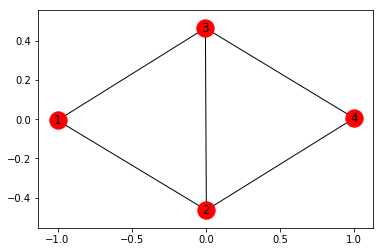

In [31]:
# Graph instance
V = [1, 2, 3, 4,]
E = [(1, 2), (1,3), (2, 3), (2,4), (3,4)]
g = nx.Graph(E)
nx.draw_networkx(g, with_labels=True, pos=nx.spring_layout(g))

Network Satisfiability
------------------------------

In [4]:
# CNF for bridge graph
cnf = [[1, 2],
       [1, 3, 4],
       [2, 3, 5],
       [4, 5]]

# Counting algorithm via banning of solutions
t0 = time()
number_of_solutions = count_classic(cnf)
print('Number of solutions is %d in %.4f seconds' % (number_of_solutions, time()-t0))

Number of solutions is 16 in 0.0015 seconds


Source-Terminal Reliability
--------------------------------------

In [5]:
# CNF for bridge graph (source: 1, terminal: 4, vertices: {1, 2, 3, 4}, Edges: {5, 6, 7, 8, 9})
cnf = [[1],                       # vertex source
       [-4],                      # vertex terminal
       [-1, -5, 2], [-2, -5, 1],  # edge 1
       [-1, -6, 3], [-3, -6, 1],  # edge 2
       [-2, -7, 3], [-3, -7, 2],  # edge 3
       [-2, -8, 4], [-4, -8, 2],  # edge 4
       [-3, -9, 4], [-4, -9, 3],  # edge 5
      ]

# Members of sampling set S = {1, 2, 3, 4}
s=[None, True, True, True, True, False, False, False, False, False]

# Projected counting
t0 = time()
number_of_solutions = count_projected_classic(cnf, s)
print('Number of solutions is %d in %.4f seconds' % (number_of_solutions, time()-t0))

Number of solutions is 16 in 0.0083 seconds
